In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
!git clone https://github.com/ruili4UCSD/CSE151A_WIN24_GROUP.git

fatal: destination path 'CSE151A_WIN24_GROUP' already exists and is not an empty directory.


# Importing and cleaning up the data
- Encode the difficulty as 0(Easy), 1(Medium), 2(Hard)
- Encode related_topics (onehot encoding) - might not be relevant but its interesting
- Ideally use some nlp thing in order to trainslate description to something usable
- drop: id, title, description, solution_link, url, asked_by_faang
- change companies into faang count/total count


In [14]:
raw_data = pd.read_csv("CSE151A_WIN24_GROUP/data/dataset/leetcode_dataset - lc.csv")

In [15]:
raw_data.info()
# print(data.dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1825 non-null   int64  
 1   title              1825 non-null   object 
 2   description        1825 non-null   object 
 3   is_premium         1825 non-null   int64  
 4   difficulty         1825 non-null   object 
 5   solution_link      987 non-null    object 
 6   acceptance_rate    1825 non-null   float64
 7   frequency          1825 non-null   float64
 8   url                1825 non-null   object 
 9   discuss_count      1825 non-null   int64  
 10  accepted           1825 non-null   object 
 11  submissions        1825 non-null   object 
 12  companies          1749 non-null   object 
 13  related_topics     1571 non-null   object 
 14  likes              1825 non-null   int64  
 15  dislikes           1825 non-null   int64  
 16  rating             1825 

In [16]:
raw_data.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


In [17]:
data = raw_data

In [18]:
#Encode difficulty
data.loc[raw_data['difficulty'] == 'Easy', 'difficulty'] = 0
data.loc[raw_data['difficulty'] == 'Medium', 'difficulty'] = 1
data.loc[raw_data['difficulty'] == 'Hard', 'difficulty'] = 2
data['difficulty'] = pd.to_numeric(data.loc[:, 'difficulty'])

In [19]:
data.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,0,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,1,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,1,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,2,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,1,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


In [20]:
data.drop(columns=["id", "title", "description", "solution_link", "url", "asked_by_faang", "similar_questions"], inplace=True)

In [21]:
data.head()

,is_premium,difficulty,acceptance_rate,frequency,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating
0,0,0,46.7,100.0,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97
1,0,1,35.7,93.1,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81
2,0,1,31.5,90.9,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95
3,0,2,31.4,86.2,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87
4,0,1,30.6,84.7,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94


In [22]:
# sources: https://www.geeksforgeeks.org/python-pandas-series-str-count/
# https://saturncloud.io/blog/how-to-check-if-pandas-column-has-value-from-list-of-strings/#:~:text=One%20simple%20and%20efficient%20way,contained%20in%20the%20given%20list
# https://www.freecodecamp.org/news/dataframe-drop-column-in-pandas-how-to-remove-columns-from-dataframes/#:~:text=drop()%20Method%20in%20Pandas,the%20inplace%20parameter%20to%20True%20
import re
company_series = data["companies"]
fb_count = company_series.str.count("Facebook", re.I)
am_count = company_series.str.count("Amazon", re.I)
ap_count = company_series.str.count("Apple", re.I)
nf_count = company_series.str.count("Netflix", re.I)
gl_count = company_series.str.count("Google", re.I)

faang_count = fb_count + am_count + ap_count + nf_count + gl_count

total_company_count = company_series.str.count(",")
total_company_count = total_company_count + 1

non_faang_count = total_company_count - faang_count

data["faang_count"] = faang_count
data["non_faang_count"] = non_faang_count
data.drop(columns=["companies"], inplace=True)
data.head()

,is_premium,difficulty,acceptance_rate,frequency,discuss_count,accepted,submissions,related_topics,likes,dislikes,rating,faang_count,non_faang_count
0,0,0,46.7,100.0,999,4.1M,8.7M,"Array,Hash Table",20217,712,97,4.0,16.0
1,0,1,35.7,93.1,999,1.9M,5.2M,"Linked List,Math,Recursion",11350,2704,81,4.0,9.0
2,0,1,31.5,90.9,999,2.1M,6.7M,"Hash Table,Two Pointers,String,Sliding Window",13810,714,95,4.0,16.0
3,0,2,31.4,86.2,999,904.7K,2.9M,"Array,Binary Search,Divide and Conquer",9665,1486,87,4.0,8.0
4,0,1,30.6,84.7,999,1.3M,4.1M,"String,Dynamic Programming",10271,670,94,3.0,8.0


In [23]:
#convert accepted and submissions to ints
def convert_to_int(s):
  if isinstance(s, (int, float)):
    return s
  elif pd.isna(s):
    return 0

  if 'K' in s:
    return float(s.replace('K', '')) * 1000
  elif 'M' in s:
    return float(s.replace('M', '')) * 1000000
  else:
    return s
data['accepted'] = data['accepted'].apply(convert_to_int)
data['submissions'] = data['submissions'].apply(convert_to_int)

In [24]:
related_topics = data['related_topics'].str.get_dummies(sep=",").columns.to_list()

In [25]:
#one hot encode related_topics
data = pd.concat([data.drop(columns=['related_topics']), data['related_topics'].str.get_dummies(sep=",")], axis=1)

In [34]:
data

,is_premium,difficulty,acceptance_rate,frequency,discuss_count,accepted,submissions,likes,dislikes,rating,...,Sliding Window,Sort,Stack,String,Suffix Array,Topological Sort,Tree,Trie,Two Pointers,Union Find
0,0,0,46.7,100.0,999,4100000.0,8700000.0,20217,712,97,...,0,0,0,0,0,0,0,0,0,0
1,0,1,35.7,93.1,999,1900000.0,5200000.0,11350,2704,81,...,0,0,0,0,0,0,0,0,0,0
2,0,1,31.5,90.9,999,2100000.0,6700000.0,13810,714,95,...,1,0,0,1,0,0,0,0,1,0
3,0,2,31.4,86.2,999,904700.0,2900000.0,9665,1486,87,...,0,0,0,0,0,0,0,0,0,0
4,0,1,30.6,84.7,999,1300000.0,4100000.0,10271,670,94,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1,0,88.9,0.0,15,305,343,2,2,50,...,0,0,0,0,0,0,0,0,0,0
1821,0,0,67.8,0.0,104,7900.0,11700.0,37,4,90,...,0,0,0,0,0,0,0,0,0,0
1822,0,1,71.8,0.0,135,6800.0,9500.0,81,4,95,...,0,0,0,0,0,0,0,0,0,0
1823,0,1,47.2,0.0,134,5000.0,10700.0,147,8,95,...,0,0,0,0,0,0,0,0,0,0


# Data Exploration
- See the coorolation between difficulty and (acceptence rate, frequency?, submissions, topics, like to dislike)
- All data visualizations

## Pairplot
We have opted to remove the one hot encoded data in our pairplot as it takes much to long to load if we do. 

/Users/davidchoi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


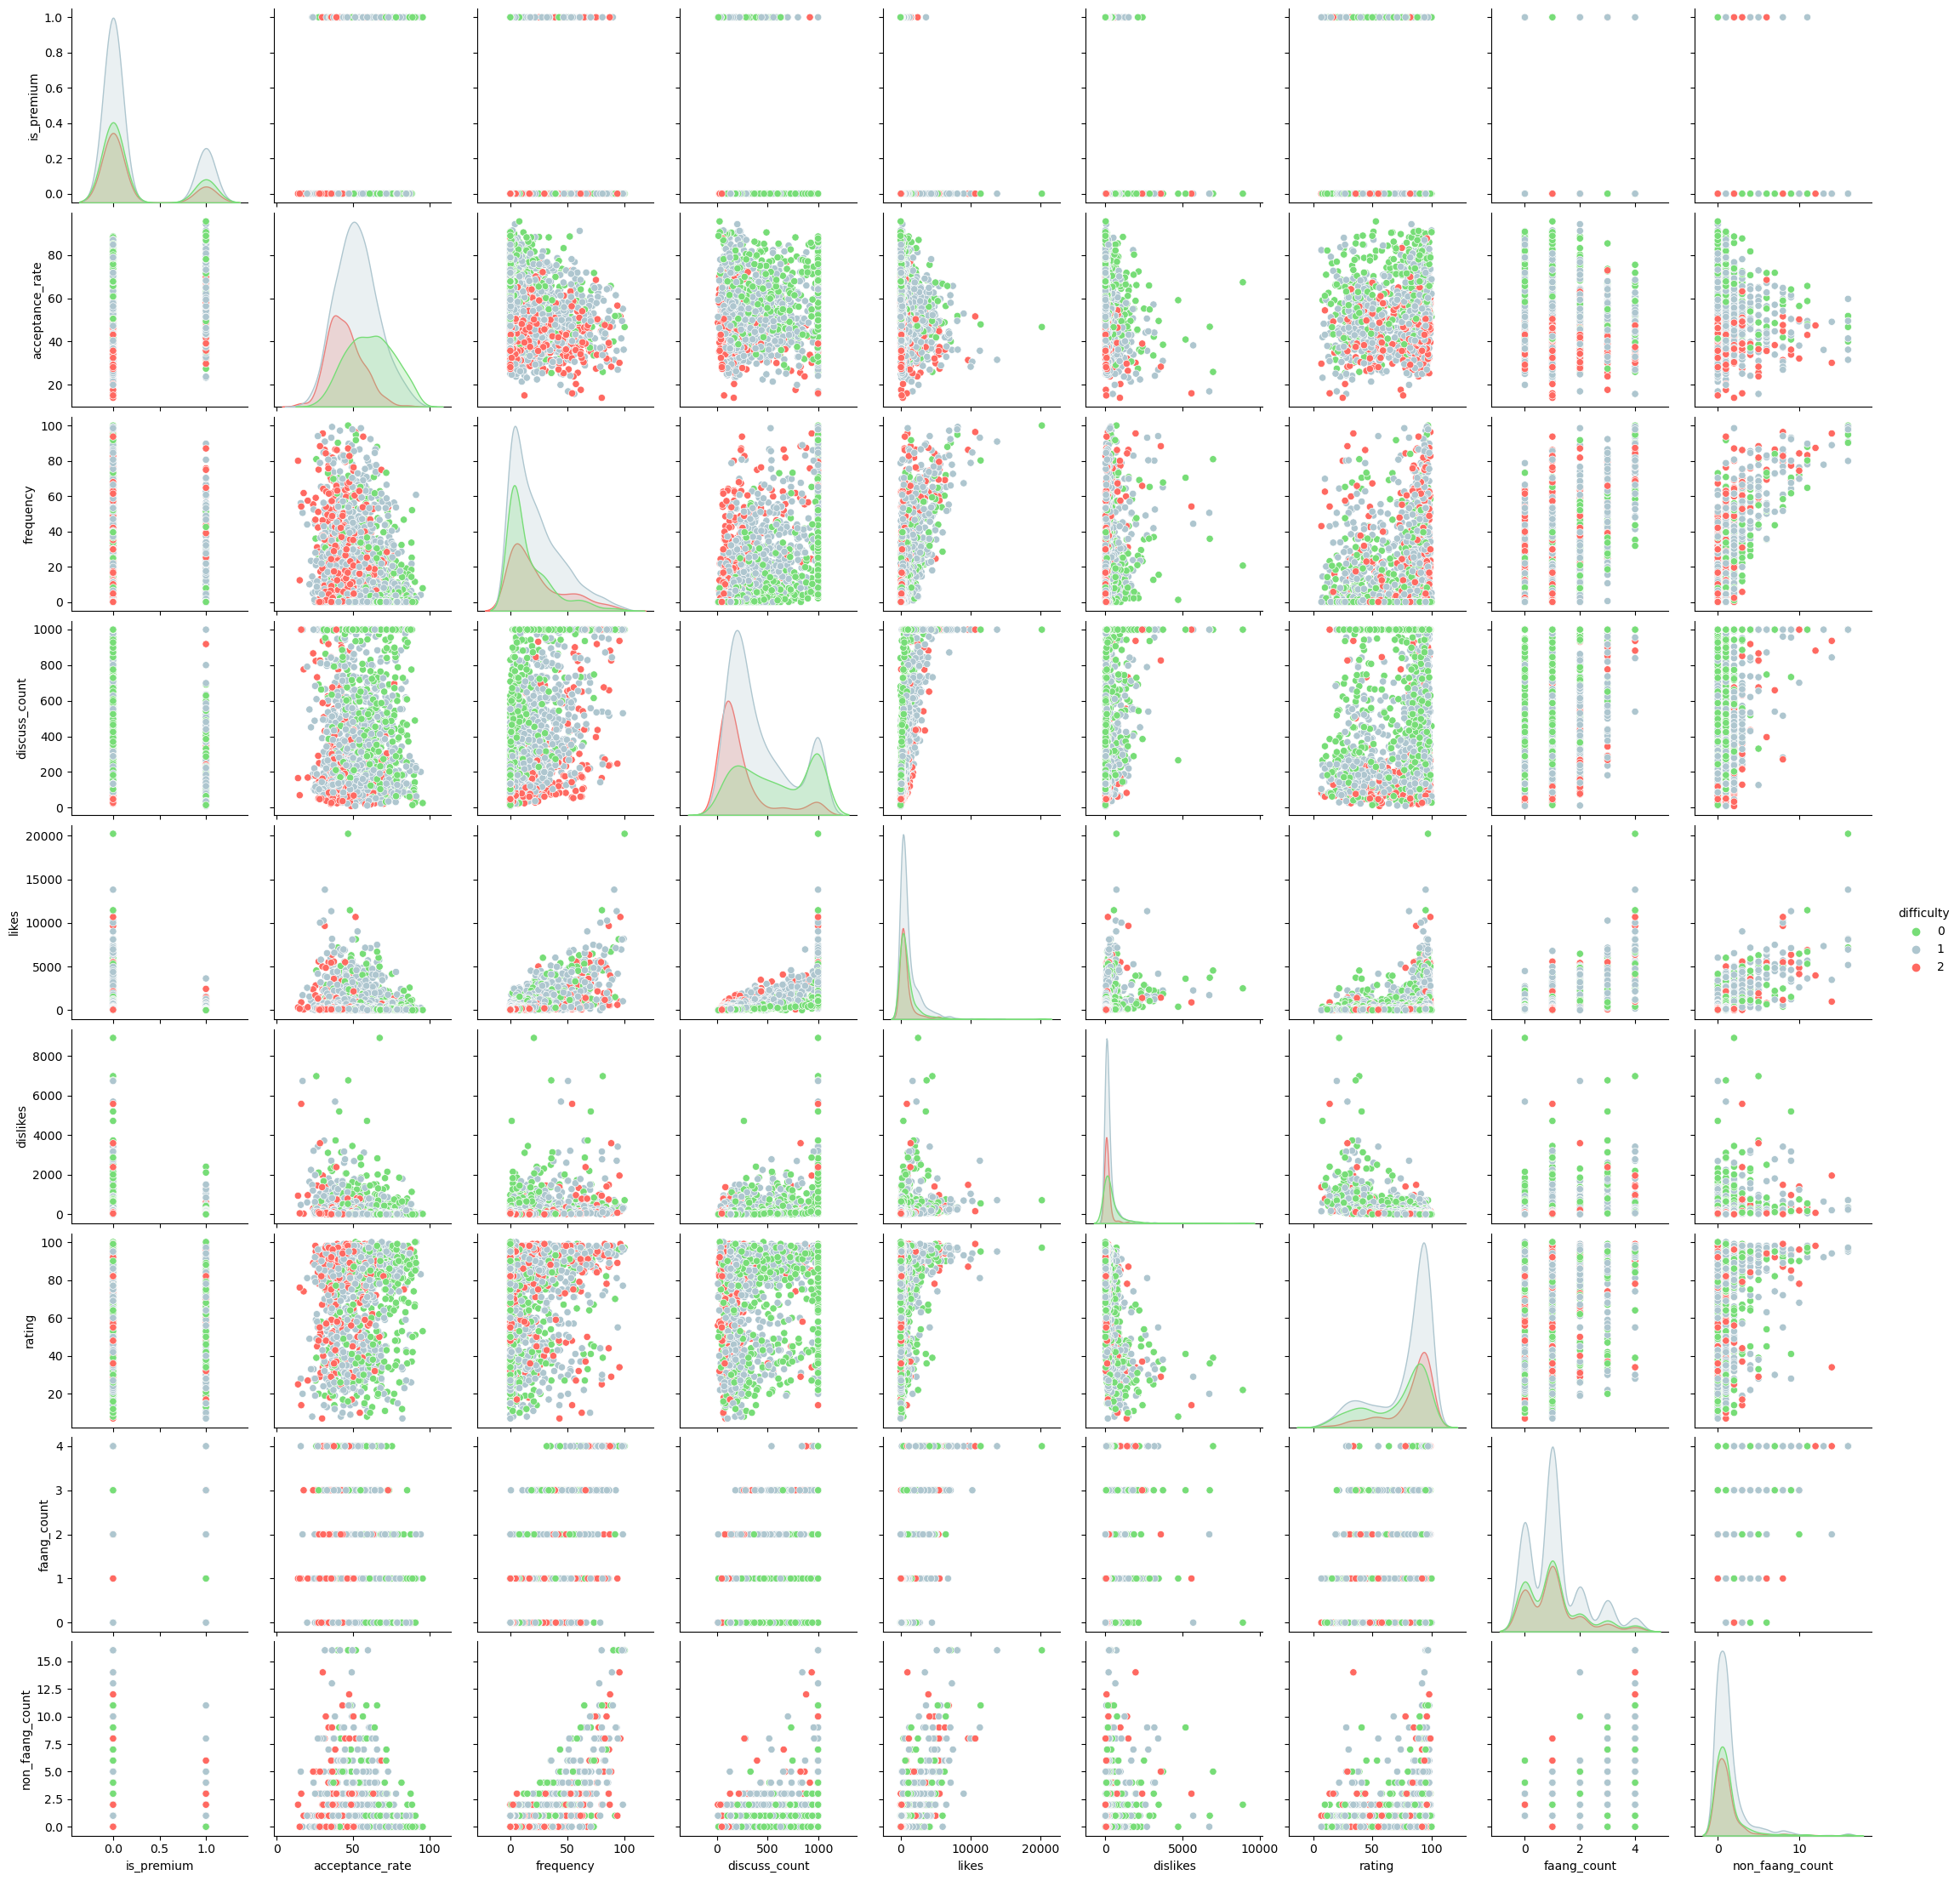

In [46]:
#TODO plot the data with the one hot encoding
#with our pair plot we exclude the one hot encoding as it takes the pairplot forever to plot
palette = ['#77dd77', '#aec6cf', '#ff6961']  
sns.pairplot(data.drop(related_topics, axis=1), hue='difficulty', palette=palette)

Some interesting things to note from our pair plot include:
- That discussion and acceptence rate seem most corrolated with difficulty.
- Likes and dislikes are inversely coorolated.
- non-faang count and frequency look to be positively corrolated.

But our pairplot isn't giving us a ton of stuff relevant information for our goal. So thats why we move on to our heat map/corrolation matrix.

## Coorrolation Matrix
We now move onto our corrolation matrix, which we hope will give us a little more insight into our data. We need to start by normalizing our data. We use minmax normalization since only some of our data looks to be normally distributed.

In [27]:
#note we need to fix 'accepted' and 'submissions' as they are strings rn
normalized_data = data
def minMaxNormalizeSeries(series):
  if series.dtype != object:
    min = series.min()
    max = series.max()
    series = (series-min)/(max-min)
  return series
normalized_data.apply(minMaxNormalizeSeries, axis = 0)

,is_premium,difficulty,acceptance_rate,frequency,discuss_count,accepted,submissions,likes,dislikes,rating,...,Sliding Window,Sort,Stack,String,Suffix Array,Topological Sort,Tree,Trie,Two Pointers,Union Find
0,0.0,0.0,0.401469,1.000,1.000000,4100000.0,8700000.0,1.000000,0.080000,0.967742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.266830,0.931,1.000000,1900000.0,5200000.0,0.561365,0.303820,0.795699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.215422,0.909,1.000000,2100000.0,6700000.0,0.683057,0.080225,0.946237,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.214198,0.862,1.000000,904700.0,2900000.0,0.478011,0.166966,0.860215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.204406,0.847,1.000000,1300000.0,4100000.0,0.507989,0.075281,0.935484,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1.0,0.0,0.917993,0.000,0.006061,305,343,0.000000,0.000225,0.462366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1821,0.0,0.0,0.659731,0.000,0.095960,7900.0,11700.0,0.001731,0.000449,0.892473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1822,0.0,0.5,0.708690,0.000,0.127273,6800.0,9500.0,0.003908,0.000449,0.946237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,0.0,0.5,0.407589,0.000,0.126263,5000.0,10700.0,0.007173,0.000899,0.946237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now can now look at our corrolation matrix.

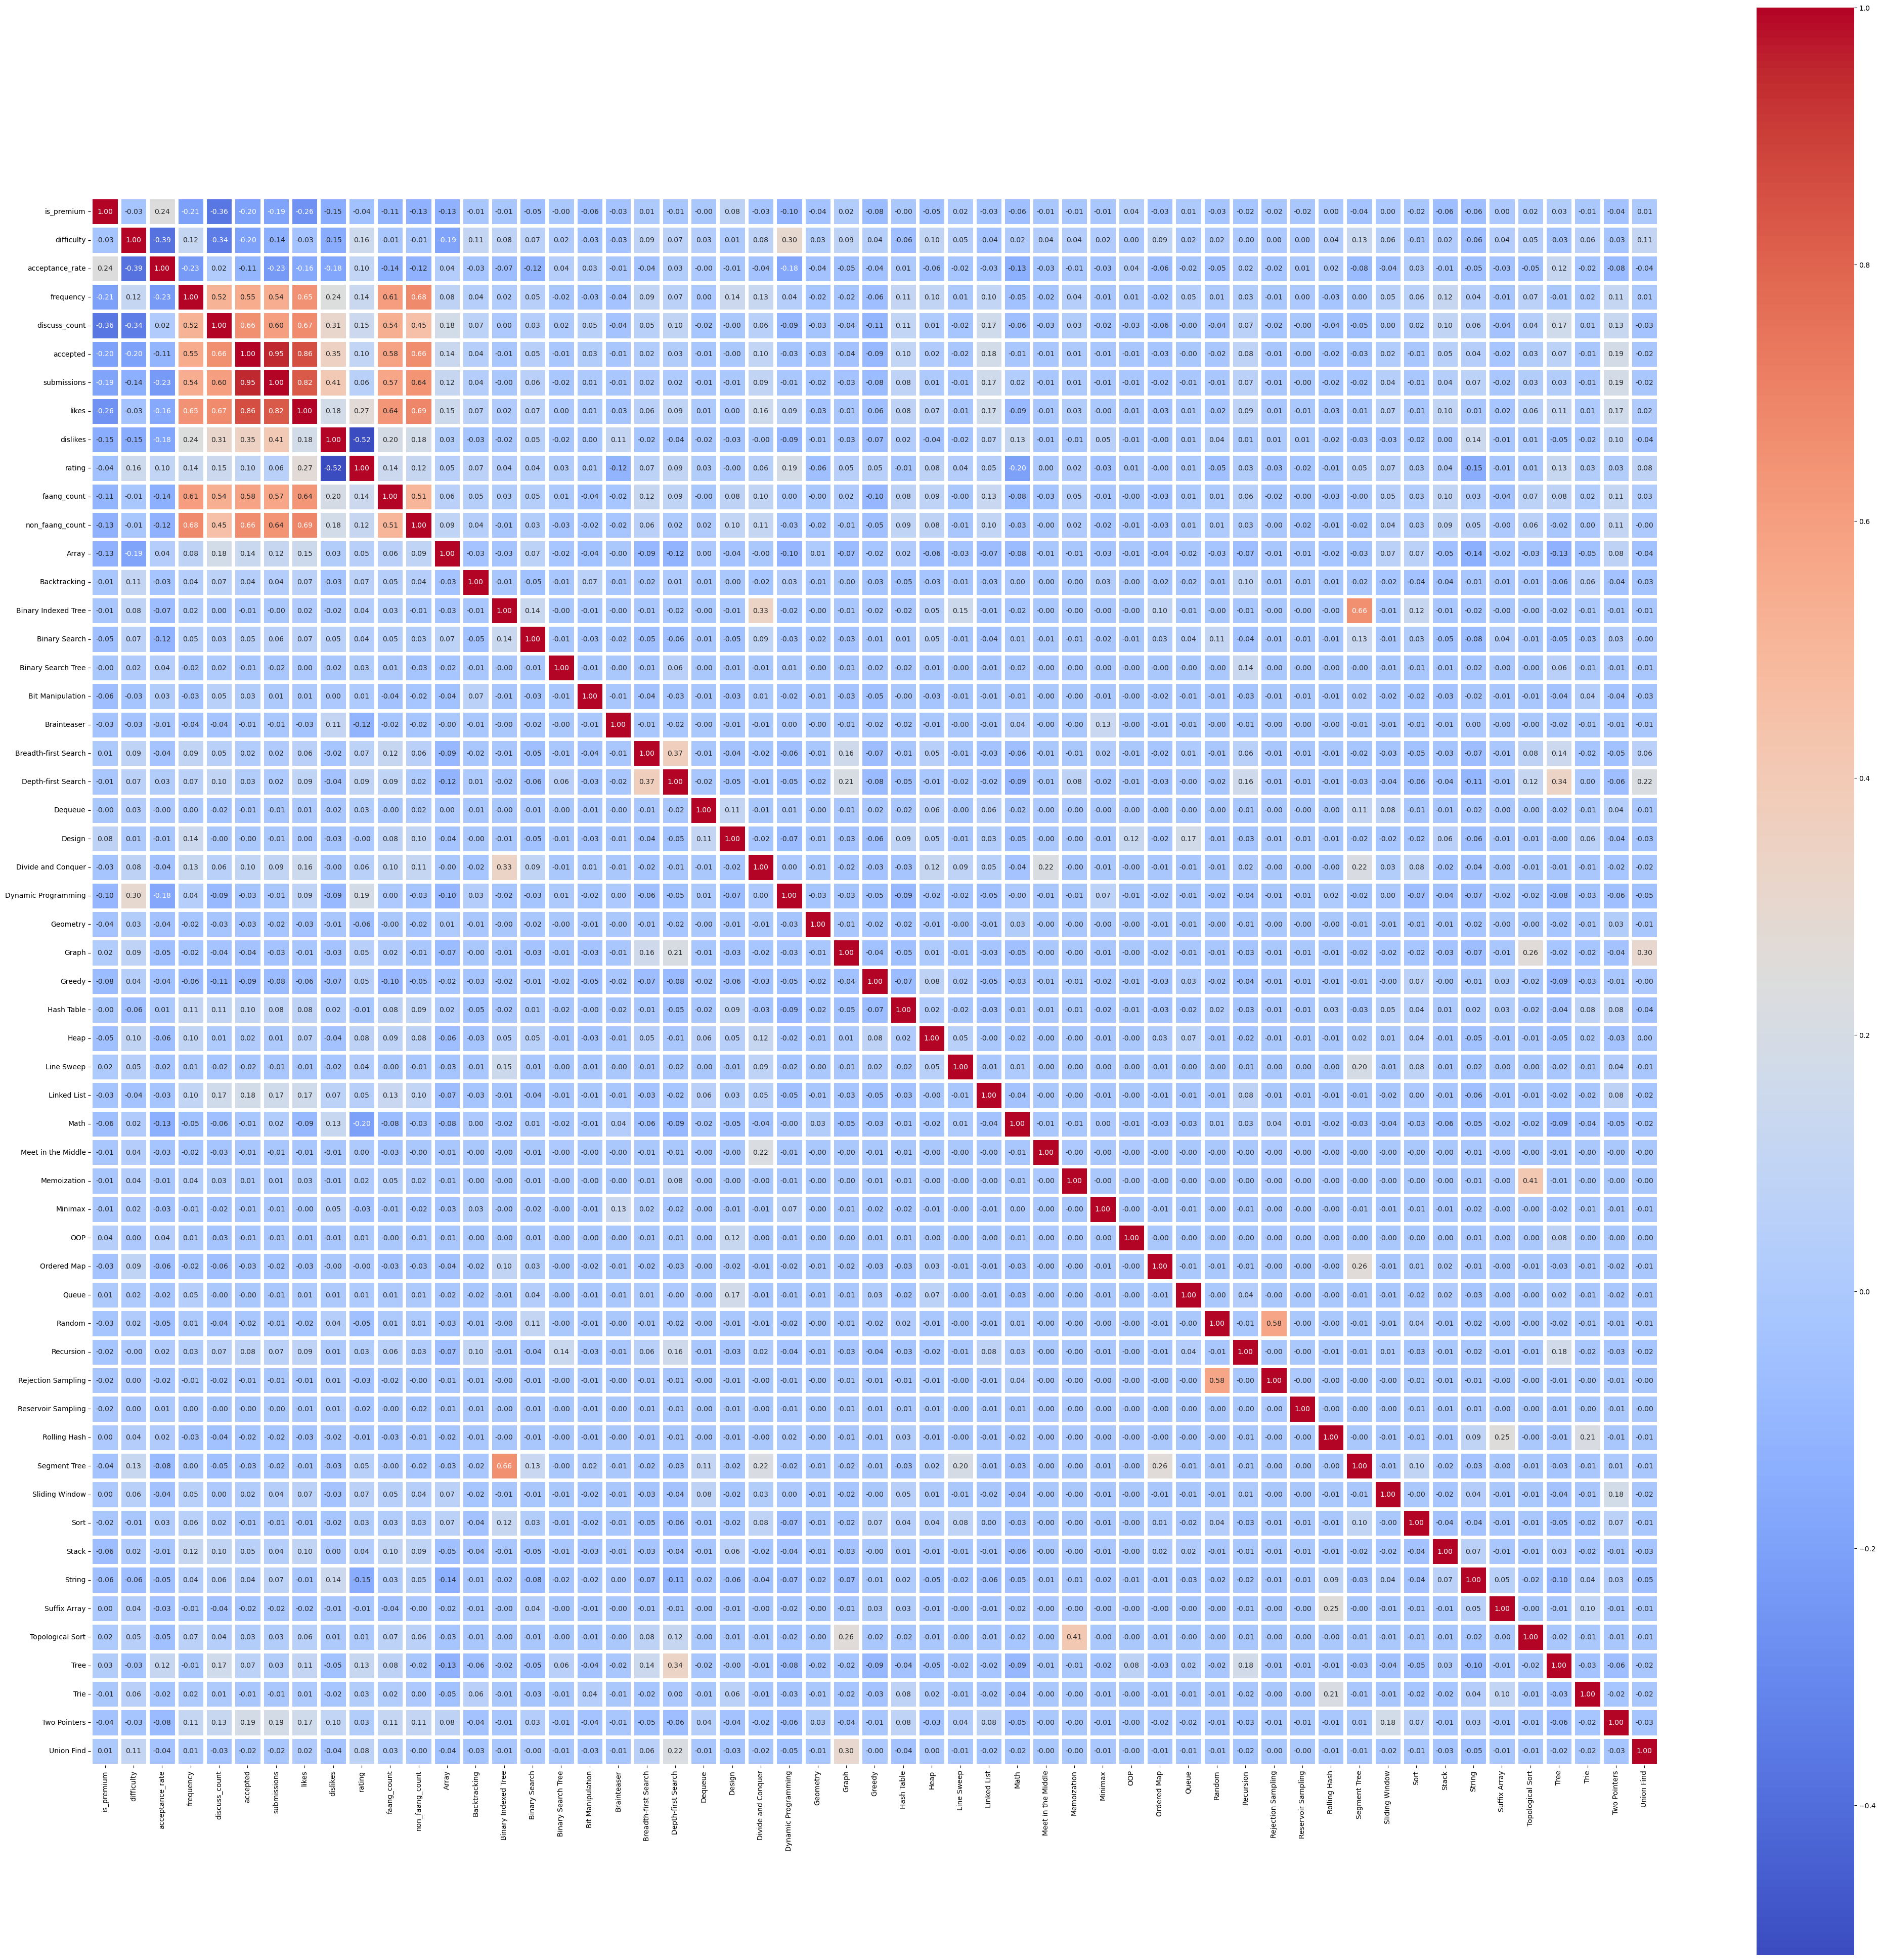

In [28]:
#TODO remove the drop once accepted and submissions are fixed
dataplot = normalized_data

plt.figure(figsize=(50, 50))
sns.heatmap(dataplot.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)
plt.show()

So with this corrolation matrix we can get a better understanding of what variables are correlated with others. For example:
- We can see how many of the Tree topics have positive correlation with eachother
- Discussion is negatively correlated with rating (significantly more so than submissions), implying that the harder a problem is the less discussion there will be.
- The most negatively correlated topic with rating is math XD (leetcoders hate math)

However, this corrolation matrix is a bit overwhelming. So lets focus on our parameter of interest, difficulty.

<Axes: >

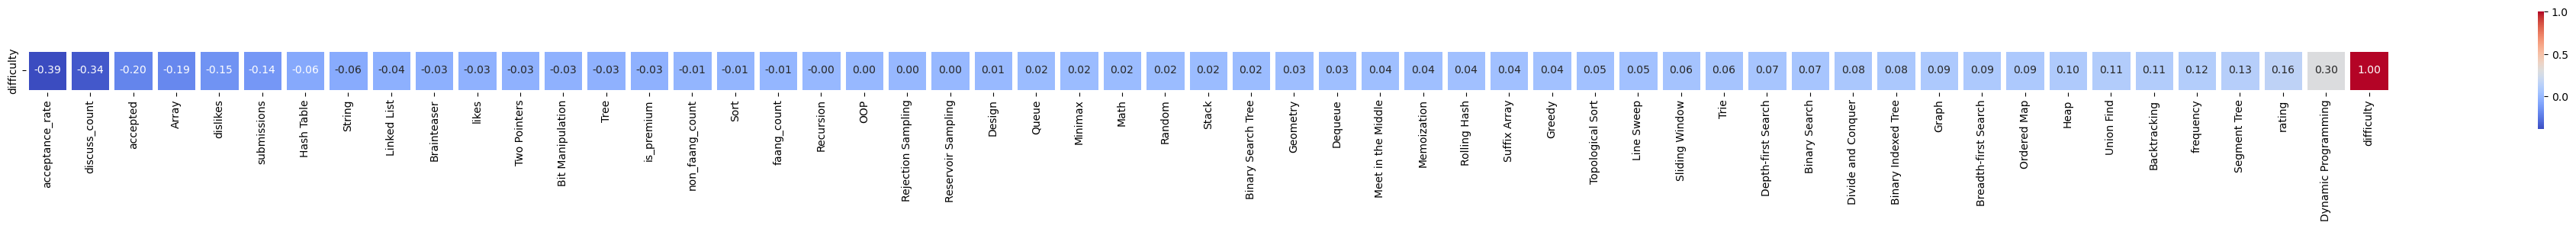

In [29]:
#Look at all the corrolation between subjects and difficulty and rank them
difficulty_vs_all = pd.DataFrame(normalized_data.corr().loc[['difficulty'], :]).sort_values(by=['difficulty'], axis = 1)
plt.figure(figsize=(50, 2))
sns.heatmap(difficulty_vs_all, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)

With all the topics mixed with all the other data its still a bit hard to see whats going on. So we can break it down even further into related topics and the rest of the features:

In [30]:
difficulty_vs_related_topics = difficulty_vs_all.loc[:, related_topics].sort_values(by=['difficulty'], axis = 1)
difficulty_vs_other = difficulty_vs_all.drop(related_topics, axis=1).sort_values(by=['difficulty'], axis = 1)

Looking at the related topics we can conclude some interesting properties.
- "Dynamic programming" is the most corrolated topic in determining problem difficulty.
- Array is the most negatively corrolated topic
- Most topic labels are associated with increased difficulty

<Axes: >

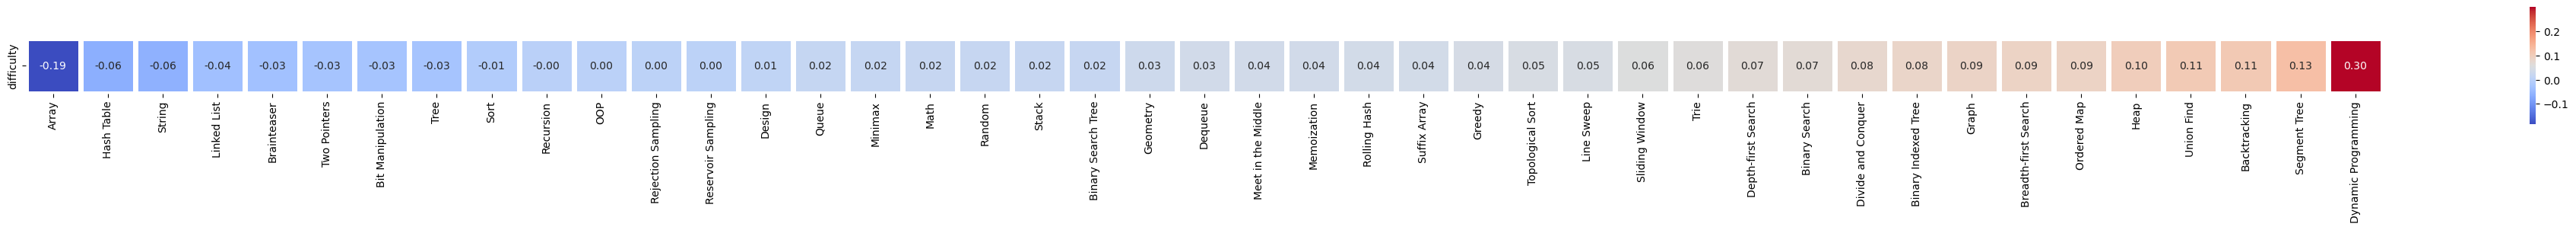

In [31]:
plt.figure(figsize=(50, 2))
sns.heatmap(difficulty_vs_related_topics, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)

Looking at the other features we can conclude some other interesting properties.
- "Acceptance rate" is the most corrolated feature determining difficulty (which seems self evident)
- "Discuss count" is the second most corrolated feature
- Dislikes seems to be a better predictor of problem difficulty than likes (which is interesting since leetcode actually hid the dislike counter)

<Axes: >

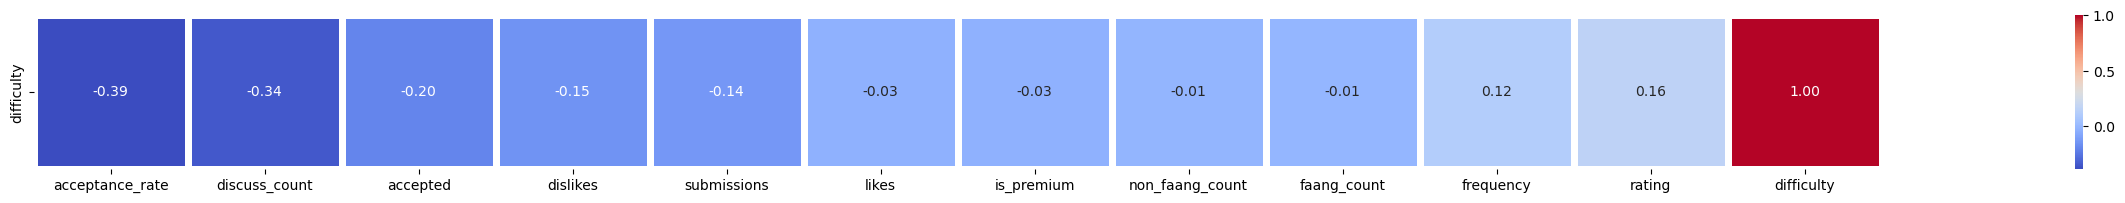

In [32]:
plt.figure(figsize=(50, 2))
sns.heatmap(difficulty_vs_other, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)

We can now clearly decide which features are relevant and which are not. We will drop all features who's corrolation is below .05 leaving us with 24 features (excluding difficulty).

25

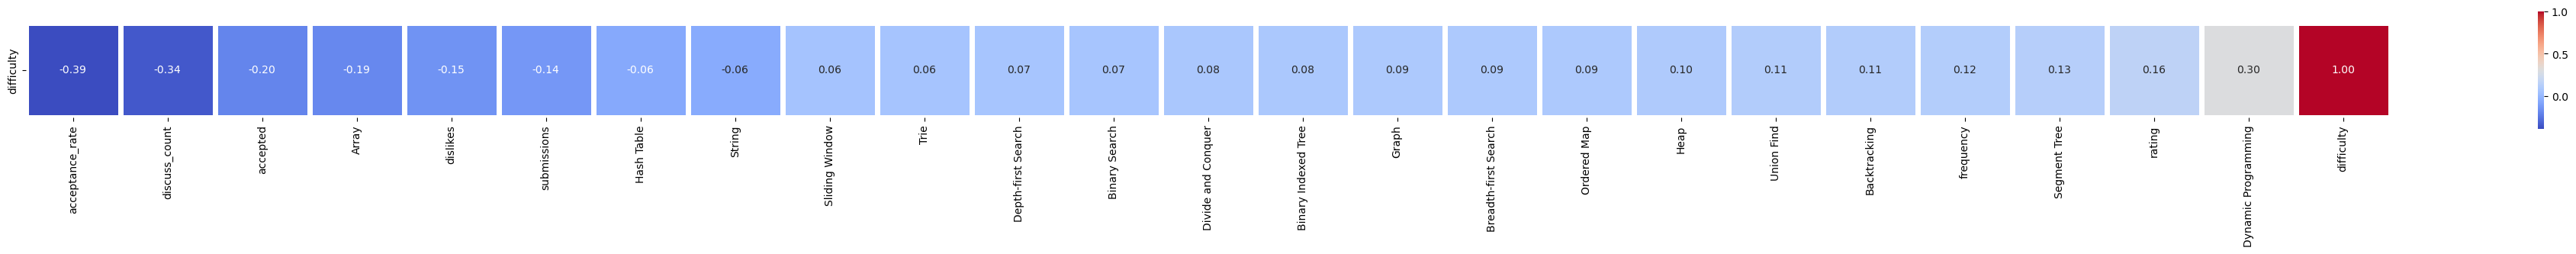

In [33]:
#Drop values with a magnitude below .05
relevant_feature_corr = difficulty_vs_all.loc[:, (abs(difficulty_vs_all) >= .05).T.difficulty]
plt.figure(figsize=(50, 2))
sns.heatmap(relevant_feature_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)
len(relevant_feature_corr.columns)

# Data Preprocessing
With all of our data exploration done we have know have landed on a handful of features we know we want to keep. 